In [29]:
import torch
from torch import nn
import pickle
from matplotlib import pyplot as plt
import os
from causal_util.helpers import CPU_Unpickler
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [60]:
path = '/home/sergei/ray_results/ve5_nonlinear_ve5_vf_server_collect_big/main_fcn_dc33f_00000_0_2021-02-19_13-13-22/checkpoint_4000/checkpoint'

In [61]:
l = CPU_Unpickler(open(path, 'rb')).load()

2021-02-19 13:33:56,184	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


Selecting name bb943a94-72ae-11eb-927a-90e2baa15230
Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb


(pid=12762) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12762) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12764) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12764) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12774) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12774) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12777) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12777) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-c

(pid=12762) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
(pid=12762) Instructions for updating:
(pid=12762) Call initializer instance with the dtype argument instead of passing it to the constructor
(pid=12762) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
(pid=12762) Instructions for updating:
(pid=12762) Call initializer instance with the dtype argument instead of passing it to the constructor
(pid=12762) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling Ba

(pid=12782) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12782) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12792) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12792) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12771) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12771) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
(pid=12784) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=12784) Loading model /home/sergei/causality-disentanglement-rl/encoder/encoders/encoder-c

(pid=12792) WARNING:tensorflow:No training configuration found in save file: the model was *not* compiled. Compile it manually.
(pid=12768) 2021-02-19 13:34:02.541207: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2494125000 Hz
(pid=12768) 2021-02-19 13:34:02.543818: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5582fdb737d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
(pid=12768) 2021-02-19 13:34:02.543864: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
(pid=12789) WARNING:tensorflow:OMP_NUM_THREADS is no longer used by the default Keras config. To configure the number of threads, use tf.config.threading APIs.
(pid=12789) 2021-02-19 13:34:02.548991: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=12784) WARNING:tensorflow:No training configurat

ERROR:root:Cannot collect data Use collect_and_get_context



[26, 50, 10, 1] 10
[20, 300, 200, 50, 1] 8


In [62]:
ctx = l.collect_and_get_context()

In [63]:
value_pred = l.value_predictor(l.decoder(ctx['obs_x'])).flatten().detach().cpu().numpy()

In [64]:
value_true = ctx['reward_to_go'].flatten().detach().cpu().numpy()

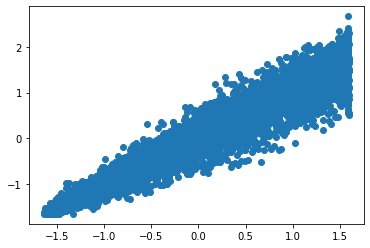

In [65]:
plt.scatter(value_pred, value_true)

In [66]:
np.mean(np.power(value_pred - value_true, 2))

0.08662659

In [59]:
np.mean(value_true)

0.020434478